## **Crop Recommendation System**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [58]:
crop_data=pd.read_csv('Crop_recommendation.csv')

In [59]:
crop_data.head(3)
crop_data.shape

(2200, 8)

**Data Preprocessing:**

---


Removing null values and constant values if any available in the dataset.
If there are any, we can either remove the entire row or we can calculate the mean/median of entire column and insert that value there.

In [60]:
# Checking null values
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [61]:
!pip install fast_ml --upgrade

In [62]:
from fast_ml.utilities import display_all
from fast_ml.feature_selection import get_constant_features

constant_features = get_constant_features(crop_data).sum()
print(constant_features)

Desc     0
Var      0
Value    0
Perc     0
dtype: object


In [63]:
crop_data.duplicated().sum()

0

**Data Visualisation**

---
Drawing a graph with features of dataset using matplotlib library or
seaborn library.



In [64]:
import plotly.express as px
fig=px.box(crop_data,y="P",points="all")
fig.show()

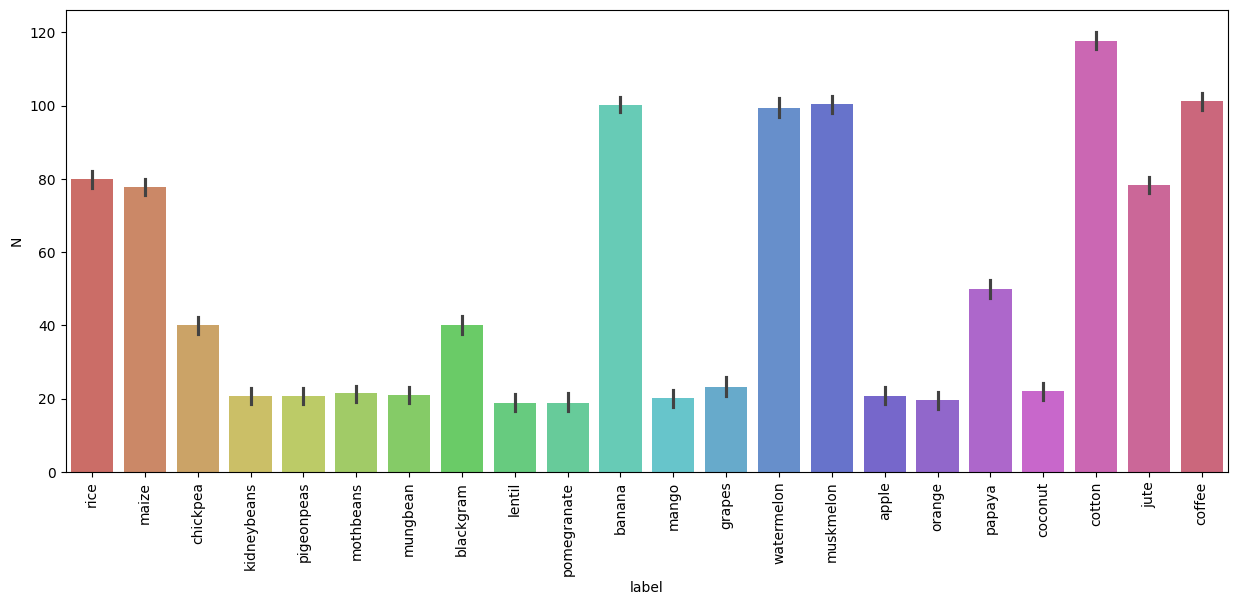

In [65]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=crop_data,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [66]:
fig1=px.bar(crop_data,x='label',y='P')
fig1.show()

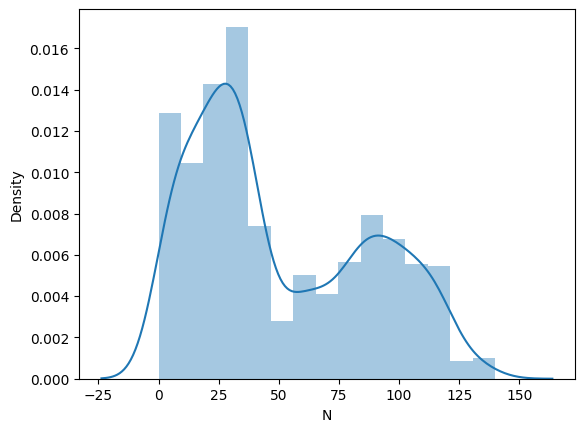

In [67]:
sns.distplot(crop_data['N'])
plt.show()

In [68]:
crop_data1=crop_data.copy()
crop_data1.head()
crop_data1.drop('label', axis=1, inplace=True)

<Axes: >

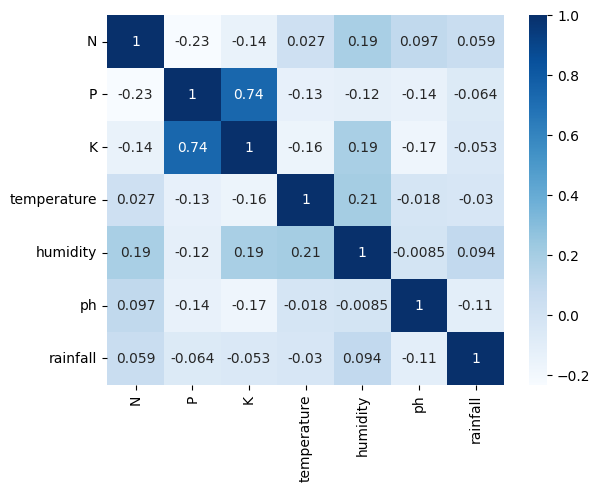

In [69]:
sns.heatmap(crop_data1.corr(),annot=True,cmap='Blues')

In [70]:
crop_data.shape

(2200, 8)

In [71]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [72]:
import plotly.express as px
fig=px.box(crop_data,y="rainfall",points="all",title='Before Removing Outliers - for feature Rainfall')
fig.update_layout(width=1000, height=600)
fig.show()

In [73]:
import pandas as pd

# Assuming crop_data is the original DataFrame
df_crop = crop_data.copy()
df_crop.columns = df_crop.columns
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [74]:

# IQR
q1 = np.percentile(df_crop['rainfall'], 25, interpolation='midpoint')
q3 = np.percentile(df_crop['rainfall'], 75, interpolation='midpoint')
IQR = q3 - q1

print("Old Shape: ", df_crop.shape)

upper = np.where(df_crop['rainfall'] >= (q3 + 1.5 * IQR))
lower = np.where(df_crop['rainfall'] <= (q1 - 1.5 * IQR))

if upper[0].size > 0:
    df_crop.drop(df_crop.index[upper[0]], inplace=True)

if lower[0].size > 0:
    df_crop.drop(df_crop.index[lower[0]], inplace=True)
print("New Shape: ", df_crop.shape)

Old Shape:  (2200, 8)
New Shape:  (2101, 8)


In [128]:
import plotly.express as px
fig=px.box(df_crop,y="rainfall",points="all",title='After Removing Outliers - for feature Rainfall')
fig.update_layout(width=1000, height=600)
fig.show()

In [129]:
import plotly.express as px
fig=px.box(df_crop,y="N",points="all",title='Before Removing Outliers - for feature N')
fig.update_layout(width=1000, height=600)
fig.show()

In [77]:
# IQR
q1 = np.percentile(df_crop['N'], 25, interpolation='midpoint')
q3 = np.percentile(df_crop['N'], 75, interpolation='midpoint')
IQR = q3 - q1
print("Old Shape: ", df_crop.shape)

upper = np.where(df_crop['N'] >= (q3 + 1.5 * IQR))
lower = np.where(df_crop['N'] <= (q1 - 1.5 * IQR))

df_crop.drop(upper[0], inplace=True)
df_crop.drop(lower[0], inplace=True)
print("New Shape: ", df_crop.shape)

Old Shape:  (2101, 8)
New Shape:  (2101, 8)


In [130]:
import plotly.express as px
fig=px.box(df_crop,y="N",points="all",title='After Removing Outliers - for feature N')
fig.update_layout(width=1000, height=600)
fig.show()

In [131]:
import plotly.express as px
fig=px.box(df_crop,y="P",points="all",title='Before Removing Outliers - for feature P')
fig.update_layout(width=1000, height=600)
fig.show()

In [137]:
import pandas as pd
import numpy as np

# IQR
q1 = np.percentile(df_crop['P'], 25, interpolation='midpoint')
q3 = np.percentile(df_crop['P'], 75, interpolation='midpoint')
IQR = q3 - q1
print("Old Shape: ", df_crop.shape)

upper = np.where(df_crop['P'] >= (q3 + 1.5 * IQR))
lower = np.where(df_crop['P'] <= (q1 - 1.5 * IQR))

if upper[0].size > 0:
    df_crop.drop(df_crop.index[upper[0]], inplace=True)

if lower[0].size > 0:
    df_crop.drop(df_crop.index[lower[0]], inplace=True)

print("New Shape: ", df_crop.shape)


Old Shape:  (1787, 8)
New Shape:  (1787, 8)


In [138]:
import plotly.express as px
fig=px.box(df_crop,y="P",points="all",title='After Removing Outliers - for feature P')
fig.update_layout(width=1000, height=600)
fig.show()

In [133]:
import plotly.express as px
fig=px.box(df_crop,y="K",points="all",title='Before Removing Outliers - for feature K')
fig.update_layout(width=1000, height=600)
fig.show()

In [141]:
import pandas as pd
import numpy as np

# Your DataFrame: df_crop

q1 = np.percentile(df_crop['K'], 25, interpolation='midpoint')
q3 = np.percentile(df_crop['K'], 75, interpolation='midpoint')
IQR = q3 - q1

upper = np.where(df_crop['K'] >= (q3 + 1.5 * IQR))
lower = np.where(df_crop['K'] <= (q1 - 1.5 * IQR))
print("Old Shape: ", df_crop.shape)

if upper[0].size > 0:
    df_crop.drop(df_crop.index[upper[0]], inplace=True)

if lower[0].size > 0:
    df_crop.drop(df_crop.index[lower[0]], inplace=True)

print("New Shape: ", df_crop.shape)


Old Shape:  (1754, 8)
New Shape:  (1754, 8)


In [142]:
import plotly.express as px
fig=px.box(df_crop,y="K",points="all",title='Before Removing Outliers - for feature K')
fig.update_layout(width=1000, height=600)
fig.show()

In [135]:
import plotly.express as px
fig=px.box(df_crop,y="temperature",points="all",title='Before Removing Outliers - for feature Temperature')
fig.update_layout(width=1000, height=600)
fig.show()

In [147]:
import pandas as pd
import numpy as np

# Your DataFrame: df_crop

q1 = np.percentile(df_crop['temperature'], 25, interpolation='midpoint')
q3 = np.percentile(df_crop['temperature'], 75, interpolation='midpoint')
IQR = q3 - q1

upper = np.where(df_crop['temperature'] >= (q3 + 1.5 * IQR))
lower = np.where(df_crop['temperature'] <= (q1 - 1.5 * IQR))

print("Old Shape: ", df_crop.shape)

if upper[0].size > 0:
    df_crop.drop(df_crop.index[upper[0]], inplace=True)
if lower[0].size > 0:
    df_crop.drop(df_crop.index[lower[0]], inplace=True)

print("New Shape: ", df_crop.shape)


Old Shape:  (1691, 8)
New Shape:  (1691, 8)


In [148]:
import plotly.express as px
fig=px.box(df_crop,y="temperature",points="all",title='After Removing Outliers - for feature Temperature')
fig.update_layout(width=1000, height=600)
fig.show()

In [149]:
import plotly.express as px
fig=px.box(df_crop,y="humidity",points="all",title='Before Removing Outliers - for feature Humidity')
fig.update_layout(width=1000, height=600)
fig.show()

In [150]:
import pandas as pd
import numpy as np

# Your DataFrame: df_crop

q1 = np.percentile(df_crop['humidity'], 25, interpolation='midpoint')
q3 = np.percentile(df_crop['humidity'], 75, interpolation='midpoint')
IQR = q3 - q1

upper = np.where(df_crop['humidity'] >= (q3 + 1.5 * IQR))
lower = np.where(df_crop['humidity'] <= (q1 - 1.5 * IQR))
print("Old Shape: ", df_crop.shape)

if upper[0].size > 0:
    df_crop.drop(df_crop.index[upper[0]], inplace=True)

if lower[0].size > 0:
    df_crop.drop(df_crop.index[lower[0]], inplace=True)

print("New Shape: ", df_crop.shape)


Old Shape:  (1691, 8)
New Shape:  (1691, 8)


In [151]:
import plotly.express as px
fig=px.box(df_crop,y="humidity",points="all",title='After Removing Outliers - for feature Humidity')
fig.update_layout(width=1000, height=600)
fig.show()

In [152]:
import plotly.express as px
fig=px.box(df_crop,y="ph",points="all",title='Before Removing Outliers - for feature pH')
fig.update_layout(width=1000, height=600)
fig.show()

In [157]:
import pandas as pd
import numpy as np

# Your DataFrame: df_crop

q1 = np.percentile(df_crop['ph'], 25, interpolation='midpoint')
q3 = np.percentile(df_crop['ph'], 75, interpolation='midpoint')
IQR = q3 - q1

print("Old Shape: ", df_crop.shape)

upper = np.where(df_crop['ph'] >= (q3 + 1.5 * IQR))
lower = np.where(df_crop['ph'] <= (q1 - 1.5 * IQR))

if upper[0].size > 0:
    df_crop.drop(df_crop.index[upper[0]], inplace=True)

if lower[0].size > 0:
    df_crop.drop(df_crop.index[lower[0]], inplace=True)

print("New Shape: ", df_crop.shape)


Old Shape:  (1639, 8)
New Shape:  (1639, 8)


In [158]:
import plotly.express as px
fig=px.box(df_crop,y="ph",points="all",title='After Removing Outliers - for feature pH')
fig.update_layout(width=1000, height=600)
fig.show()

In [159]:
 df_crop.shape

(1639, 8)

In [160]:
crop_data1=df_crop.copy()
crop_data1.head()
crop_data1.drop('label', axis=1, inplace=True)

In [161]:
crop_data1.var() #after removing outliers

N              1494.293606
P               509.116407
K               232.262395
temperature      15.628223
humidity        467.410430
ph                0.420417
rainfall       2389.355033
dtype: float64

In [162]:
crop_data2=crop_data.copy()
crop_data2.head()
crop_data2.drop('label', axis=1, inplace=True)

In [163]:
#variance method
crop_data2.var() #before removing outliers

N              1362.889537
P              1088.068460
K              2565.212869
temperature      25.641550
humidity        495.677307
ph                0.598980
rainfall       3020.424469
dtype: float64

**Feature Selection**

---
Backward Feature Elimination and Forward Feature Selection


*Backward Feature Elimination*

In [164]:
data=df_crop.copy()
data.shape

(1639, 8)

In [165]:
X=data.drop(['label'],axis=1)
y=data['label']

In [166]:
X.shape,y.shape

((1639, 7), (1639,))

In [167]:
y.head()

0     rice
13    rice
14    rice
17    rice
20    rice
Name: label, dtype: object

In [170]:
pip install mlxtend

In [169]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [171]:
lreg=LinearRegression()
sfs1=sfs(lreg,k_features=5,forward=False,verbose=1,scoring='neg_mean_squared_error')

In [172]:
from sklearn.preprocessing import LabelEncoder

# Assuming y contains the target variable with string labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

sfs1 = sfs1.fit(X, y_encoded)


Features: 5/5

In [173]:
names=list(sfs1.k_feature_names_)
print(names)

['N', 'P', 'temperature', 'humidity', 'ph']


In [174]:
new_data=data[names]
new_data['label']=data['label']

In [175]:
new_data.head()

,N,P,temperature,humidity,ph,label
0,90,42,20.879744,82.002744,6.502985,rice
13,93,56,24.014976,82.056872,6.984354,rice
14,94,50,25.665852,80.663850,6.948020,rice
17,91,35,23.793920,80.418180,6.970860,rice
20,89,45,21.325042,80.474764,6.442475,rice


In [176]:
new_data.shape,data.shape

((1639, 6), (1639, 8))

***Forward Feature Selection***

In [177]:
lreg=LinearRegression()
sfs2=sfs(lreg,k_features=5,forward=True,verbose=2,scoring='neg_mean_squared_error')

In [178]:
from sklearn.preprocessing import LabelEncoder

# Assuming y contains the target variable with string labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

sfs2 = sfs2.fit(X, y_encoded)



[2024-05-08 20:01:18] Features: 1/5 -- score: -33.20949601233367
[2024-05-08 20:01:18] Features: 2/5 -- score: -34.77477943403376
[2024-05-08 20:01:19] Features: 3/5 -- score: -35.929468967571765
[2024-05-08 20:01:19] Features: 4/5 -- score: -38.23442939616657
[2024-05-08 20:01:19] Features: 5/5 -- score: -41.009827476136785

In [179]:
names=list(sfs2.k_feature_names_)
print(names)

['N', 'P', 'temperature', 'humidity', 'ph']


In [180]:
new_data1=data[names]
new_data1['label']=data['label']

In [181]:
new_data1.head()

,N,P,temperature,humidity,ph,label
0,90,42,20.879744,82.002744,6.502985,rice
13,93,56,24.014976,82.056872,6.984354,rice
14,94,50,25.665852,80.663850,6.948020,rice
17,91,35,23.793920,80.418180,6.970860,rice
20,89,45,21.325042,80.474764,6.442475,rice


In [182]:
new_data1.shape,data.shape

((1639, 6), (1639, 8))

As we can see, we got the same data while implementing Backward Feature Elimination or Forward Feature Selection.

In [183]:
def get_covariance_matrix(X, ddof=0):
    n_samples = X.shape[0]
    C = np.dot(X.T, X) / (n_samples - ddof)
    return C

C = get_covariance_matrix(X, ddof=0)

print(C.shape)

(7, 7)


In [184]:
print(C)

[[ 4707.07504576  2465.87248322  2026.88956681  1458.44689705
   4216.47555355   370.05542611  5496.06949822]
 [ 2465.87248322  2553.40146431  1427.5466748   1157.89399566
   2955.03315343   293.89578205  4383.70171531]
 [ 2026.88956681  1427.5466748   1286.13117755   831.22308161
   2314.94229698   210.66530317  3157.68256681]
 [ 1458.44689705  1157.89399566   831.22308161   680.28065202
   1835.61467387   167.22890869  2497.37824734]
 [ 4216.47555355  2955.03315343  2314.94229698  1835.61467387
   5403.54949842   457.22560194  6818.2088514 ]
 [  370.05542611   293.89578205   210.66530317   167.22890869
    457.22560194    42.51537984   628.64527718]
 [ 5496.06949822  4383.70171531  3157.68256681  2497.37824734
   6818.2088514    628.64527718 11929.90051146]]


<Axes: >

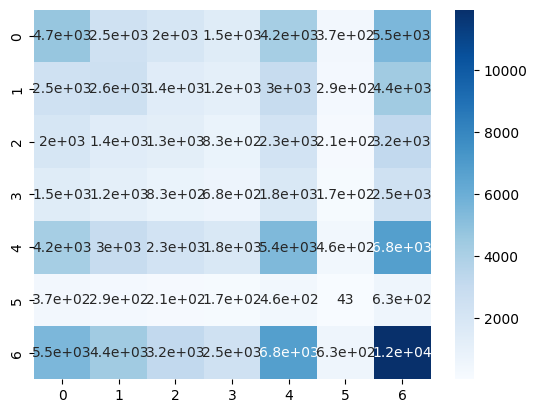

In [186]:
sns.heatmap(C,annot=True,cmap='Blues')

**Model Creation**

Test Data Splitting

In [109]:
from sklearn.model_selection import train_test_split

In [187]:
new_data.shape #backward feature selection
new_data.head()

,N,P,temperature,humidity,ph,label
0,90,42,20.879744,82.002744,6.502985,rice
13,93,56,24.014976,82.056872,6.984354,rice
14,94,50,25.665852,80.663850,6.948020,rice
17,91,35,23.793920,80.418180,6.970860,rice
20,89,45,21.325042,80.474764,6.442475,rice


In [111]:
# x1=crop_data.drop('label',axis=1) #without preprocessing
# y1=crop_data['label']
# x1.shape

In [208]:
x1=df_crop.drop('label',axis=1) #after removing outliers
y1=df_crop['label']
x1.shape

(1639, 7)

In [189]:
# x1=new_data.drop('label',axis=1) #after backward feature selection
# y1=new_data['label']
# x1.shape

(1639, 5)

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=2)

In [210]:
x_train.shape,x_test.shape

((1311, 7), (328, 7))

Scaling the features

In [211]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

ms.fit(x_train)
x_train=ms.transform(x_train)
x_test=ms.transform(x_test)

In [212]:
x_train.shape

(1311, 7)

Standarization

In [213]:
from sklearn.preprocessing import StandardScaler
ms=StandardScaler()

ms.fit(x_train)
x_train=ms.transform(x_train)
x_test=ms.transform(x_test)

In [214]:
x_train.shape

(1311, 7)

Training Models

In [215]:
acc = []
model = []

#K-Nearest Neighbours

In [227]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

KNN = KNeighborsClassifier(n_neighbors=5)

KNN.fit(x_train, y_train)

predicted_values = KNN.predict(x_test)

accuracy = metrics.accuracy_score(y_test, predicted_values)
acc.append(accuracy)
model.append('KNN')

print("KNN's Accuracy is: ", accuracy * 100)

print(classification_report(y_test, predicted_values))


KNN's Accuracy is:  96.34146341463415
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        16
   blackgram       0.90      0.95      0.93        20
    chickpea       1.00      1.00      1.00         9
     coconut       1.00      1.00      1.00        14
      coffee       1.00      0.97      0.98        29
      cotton       1.00      1.00      1.00        27
        jute       0.82      1.00      0.90         9
 kidneybeans       0.90      1.00      0.95        19
      lentil       0.79      0.94      0.86        16
       maize       0.95      1.00      0.98        20
       mango       0.95      1.00      0.98        21
   mothbeans       1.00      0.40      0.57         5
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        11
      papaya       1.00      1.00      1.00        11
  pigeonpeas       1.00      0.77      0.87

### **Decision Tree**

In [228]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  96.64634146341463
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        16
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00         9
     coconut       1.00      1.00      1.00        14
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        27
        jute       0.69      1.00      0.82         9
 kidneybeans       1.00      1.00      1.00        19
      lentil       1.00      1.00      1.00        16
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        21
   mothbeans       0.00      0.00      0.00         5
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      0.90      0.95        21
      orange       1.00      1.00      1.00        11
      papaya       1.00      1.00      1.00        11
  pigeonpeas       0.81      1.00

In [229]:
from sklearn.model_selection import cross_val_score

# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, x1, y1,cv=5)

score

array([0.95426829, 0.94512195, 0.96036585, 0.95731707, 0.94189602])

**Random Forest**

In [230]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  99.6951219512195
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        16
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00         9
     coconut       1.00      1.00      1.00        14
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        27
        jute       1.00      1.00      1.00         9
 kidneybeans       1.00      1.00      1.00        19
      lentil       0.94      1.00      0.97        16
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.80      0.89         5
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        21
      orange       1.00      1.00      1.00        11
      papaya       1.00      1.00      1.00        11
  pigeonpeas       1.00      1.00      1.00  

In [231]:
score = cross_val_score(RF,x1,y1,cv=5)
score

array([0.98780488, 0.99085366, 0.98780488, 0.99085366, 0.98776758])



### **Accuracy Comparison**

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

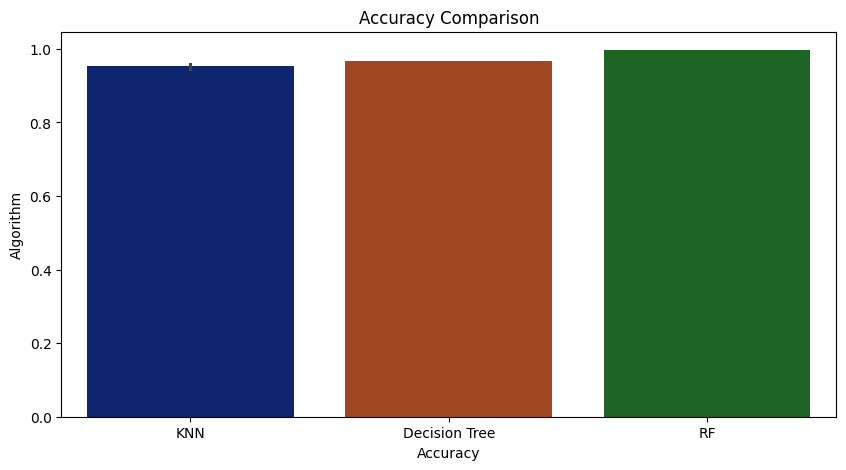

In [232]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=model,y = acc,palette='dark')

In [233]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

KNN --> 0.9634146341463414
Decision Tree --> 0.9664634146341463
RF --> 0.9969512195121951


In [239]:
data = np.array([[90,42, 43, 20.879744, 82.002744,6.502985, 202.935536]])
prediction = KNN.predict(data)
print(prediction)

['rice']


In [236]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
